## Imports

In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-08-08 16:47:05.239068: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load data

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr", "masks"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
train_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
val_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
test_masks = xr.concat(data_list, dim="p")["masks"]

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_2

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTO

In [7]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(34061, 144, 144, 1)
(4300, 144, 144, 1)
(12985, 144, 144, 1)
(34061, 2)
(4300, 2)
(12985, 2)


## Normalize data

In [8]:
# Normalize the training data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [9]:
# Normalize the output data
output_scale_stats = pd.DataFrame(index=range(output_train.shape[-1]), columns=["mean", "sd"])
output_scale_stats.loc[:, "mean"] = output_train.mean(dim="p")
output_scale_stats.loc[:, "sd"] = output_train.std(dim="p")
output_train_norm = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_norm = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_norm = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i in range(output_train.shape[-1]):
    output_train_norm[:, i] = (output_train[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_val_norm[:, i] = (output_val[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_test_norm[:, i] = (output_test[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]

## RICNN

In [10]:
ricnn_model = models.Sequential()
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
ricnn_model.add(GDL_layers.RotInvPool())
ricnn_model.add(layers.Flatten())
ricnn_model.add(layers.Dense(32, activation='relu'))
ricnn_model.add(layers.Dense(2))

2022-08-08 16:48:18.972494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 16:48:19.475736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


In [11]:
ricnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [12]:
ricnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [13]:
ricnn_history = ricnn_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10


2022-08-08 16:48:25.134743: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1065/1065 [==============================] - 84s 73ms/step - loss: 236.5443 - mse: 236.5443 - val_loss: 398.4081 - val_mse: 398.4081
Epoch 2/10
1065/1065 [==============================] - 77s 73ms/step - loss: 110.2549 - mse: 110.2549 - val_loss: 55.9066 - val_mse: 55.9066
Epoch 3/10
1065/1065 [==============================] - 77s 72ms/step - loss: 66.0941 - mse: 66.0941 - val_loss: 40.9437 - val_mse: 40.9437
Epoch 4/10
1065/1065 [==============================] - 77s 73ms/step - loss: 44.5209 - mse: 44.5209 - val_loss: 36.8409 - val_mse: 36.8409
Epoch 5/10
1065/1065 [==============================] - 78s 73ms/step - loss: 33.8390 - mse: 33.8390 - val_loss: 42.3195 - val_mse: 42.3195
Epoch 6/10
1065/1065 [==============================] - 78s 73ms/step - loss: 25.9009 - mse: 25.9009 - val_loss: 28.7118 - val_mse: 28.7118
Epoch 7/10
1065/1065 [==============================] - 77s 73ms/step - loss: 21.1305 - mse: 21.1305 - val_loss: 22.5848 - val_mse: 22.5848
Epoch 8/10
1065/1065 [===

## Normalized output RICNN

In [14]:
onorm_ricnn_model = models.Sequential()
onorm_ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
onorm_ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
onorm_ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
onorm_ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
onorm_ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
onorm_ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
onorm_ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
onorm_ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
onorm_ricnn_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
onorm_ricnn_model.add(GDL_layers.RotInvPool())
onorm_ricnn_model.add(layers.Flatten())
onorm_ricnn_model.add(layers.Dense(32, activation='relu'))
onorm_ricnn_model.add(layers.Dense(2))

In [15]:
onorm_ricnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_5 (RotEqui  (None, 142, 142, 4, 32)  320       
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_4 (RotEqui  (None, 71, 71, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_6 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_5 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_7 (RotEqui  (None, 32, 32, 4, 64)   

In [16]:
onorm_ricnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [17]:
onorm_ricnn_history = onorm_ricnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1065/1065 [==============================] - 83s 74ms/step - loss: 0.2689 - mse: 0.2689 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 2/10
1065/1065 [==============================] - 79s 74ms/step - loss: 0.1128 - mse: 0.1128 - val_loss: 0.0655 - val_mse: 0.0655
Epoch 3/10
1065/1065 [==============================] - 78s 74ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 4/10
1065/1065 [==============================] - 78s 74ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 5/10
1065/1065 [==============================] - 80s 75ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 6/10
1065/1065 [==============================] - 79s 74ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 7/10
1065/1065 [==============================] - 78s 73ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 8/10
1065/1065 [==========================

## CNN

In [18]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [19]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [20]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [21]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train, epochs=10, validation_data=(input_val_norm, output_val))

Epoch 1/10
1065/1065 [==============================] - 21s 19ms/step - loss: 242.6957 - mse: 242.6957 - val_loss: 134.9433 - val_mse: 134.9433
Epoch 2/10
1065/1065 [==============================] - 19s 18ms/step - loss: 150.7895 - mse: 150.7895 - val_loss: 71.1904 - val_mse: 71.1904
Epoch 3/10
1065/1065 [==============================] - 18s 17ms/step - loss: 110.6775 - mse: 110.6775 - val_loss: 59.7966 - val_mse: 59.7966
Epoch 4/10
1065/1065 [==============================] - 19s 18ms/step - loss: 83.1654 - mse: 83.1654 - val_loss: 77.6603 - val_mse: 77.6603
Epoch 5/10
1065/1065 [==============================] - 19s 17ms/step - loss: 66.2518 - mse: 66.2518 - val_loss: 98.0538 - val_mse: 98.0538
Epoch 6/10
1065/1065 [==============================] - 19s 17ms/step - loss: 53.1222 - mse: 53.1222 - val_loss: 40.6488 - val_mse: 40.6488
Epoch 7/10
1065/1065 [==============================] - 19s 18ms/step - loss: 44.7456 - mse: 44.7456 - val_loss: 44.4611 - val_mse: 44.4611
Epoch 8/10
1

## Output Normalized CNN

In [22]:
onorm_cnn_model = models.Sequential()
onorm_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
onorm_cnn_model.add(layers.MaxPooling2D((2, 2)))
onorm_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
onorm_cnn_model.add(layers.MaxPooling2D((2, 2)))
onorm_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
onorm_cnn_model.add(layers.MaxPooling2D((2, 2)))
onorm_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
onorm_cnn_model.add(layers.MaxPooling2D((2, 2)))
onorm_cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
onorm_cnn_model.add(layers.Flatten())
onorm_cnn_model.add(layers.Dense(32, activation='relu'))
onorm_cnn_model.add(layers.Dense(2))

In [23]:
onorm_cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)      

In [24]:
onorm_cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [25]:
onorm_cnn_history = onorm_cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1065/1065 [==============================] - 20s 17ms/step - loss: 0.3115 - mse: 0.3115 - val_loss: 0.1667 - val_mse: 0.1667
Epoch 2/10
1065/1065 [==============================] - 17s 16ms/step - loss: 0.1803 - mse: 0.1803 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 3/10
1065/1065 [==============================] - 17s 16ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 4/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 5/10
1065/1065 [==============================] - 17s 16ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 6/10
1065/1065 [==============================] - 18s 16ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 7/10
1065/1065 [==============================] - 18s 17ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0963 - val_mse: 0.0963
Epoch 8/10
1065/1065 [==========================

## History Plots

(0.0, 417.60675559043887)

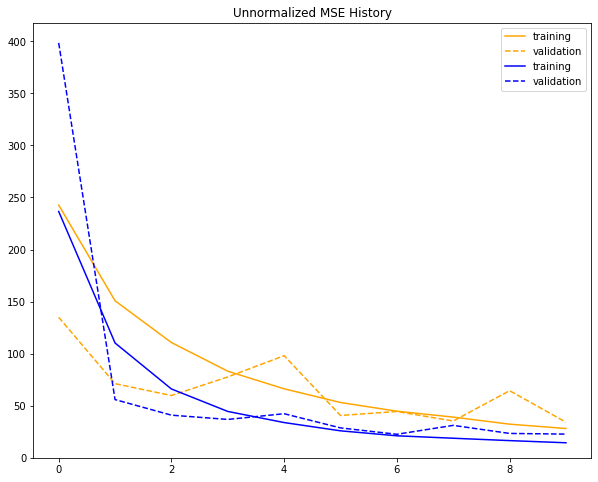

In [26]:
F, ax = plt.subplots(figsize=(10, 8))
ax = plt.gca()
a = ax.plot(cnn_history.history['mse'], label='training', color='orange')
b = ax.plot(cnn_history.history['val_mse'], label='validation', color='orange', linestyle='dashed')
c = ax.plot(ricnn_history.history['mse'], label='training', color='blue')
d = ax.plot(ricnn_history.history['val_mse'], label='validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("Unnormalized MSE History")
ax.set_ylim(bottom=0)

(0.0, 0.32575002806261183)

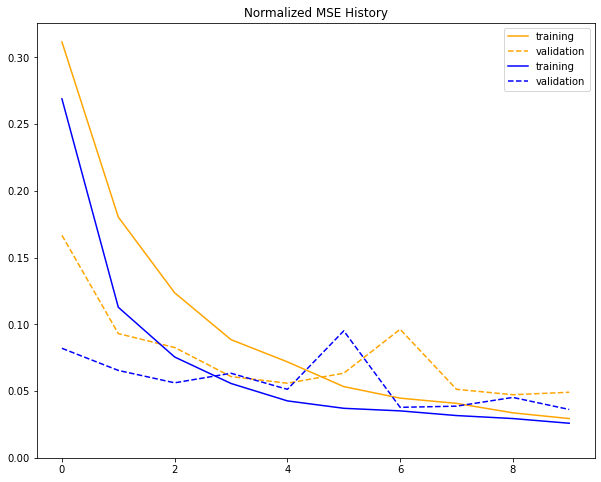

In [27]:
F, ax = plt.subplots(figsize=(10, 8))
ax = plt.gca()
a = ax.plot(onorm_cnn_history.history['mse'], label='training', color='orange')
b = ax.plot(onorm_cnn_history.history['val_mse'], label='validation', color='orange', linestyle='dashed')
c = ax.plot(onorm_ricnn_history.history['mse'], label='training', color='blue')
d = ax.plot(onorm_ricnn_history.history['val_mse'], label='validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("Normalized MSE History")
ax.set_ylim(bottom=0)

## Save and load models

In [28]:
ricnn_model.save("saved_models/initial_rot_inv_CNN/ricnn_model")
cnn_model.save("saved_models/initial_rot_inv_CNN/cnn_model")

INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/ricnn_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


In [29]:
ricnn_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/ricnn_model")
cnn_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/cnn_model")

## Evaluate models

In [30]:
ricnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 12s 28ms/step - loss: 835.6879 - mse: 835.6879


[835.6878662109375, 835.6878662109375]

In [31]:
cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 5s 12ms/step - loss: 811.7746 - mse: 811.7746


[811.7745971679688, 811.7745971679688]

In [32]:
onorm_ricnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 11s 28ms/step - loss: 0.0430 - mse: 0.0430


[0.0430118702352047, 0.0430118702352047]

In [33]:
onorm_cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 4s 11ms/step - loss: 0.0622 - mse: 0.0622


[0.06222842261195183, 0.06222842261195183]